<a href="https://colab.research.google.com/github/viethung52/AI/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.optimizers  import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets               import cifar10
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

array([4], dtype=uint8)

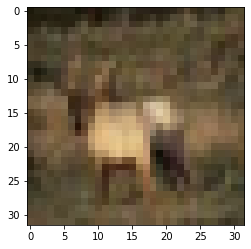

In [ ]:
i=3
plt.imshow(x_train[i])
y_train[i]

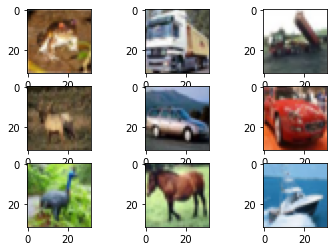

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

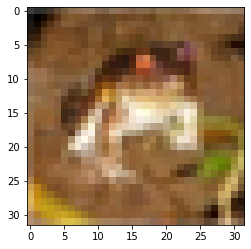

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255 # Chia từ ảnh màu thành ảnh xám
x_test/=255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
model=Sequential()
model.add(Dense(2024,kernel_initializer = 'normal' , activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(2024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2024)              6219752   
                                                                 
 dropout (Dropout)           (None, 2024)              0         
                                                                 
 dense_1 (Dense)             (None, 2024)              4098600   
                                                                 
 dropout_1 (Dropout)         (None, 2024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                20250     
                                                                 
Total params: 10,338,602
Trainable params: 10,338,602
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))) # 32 lần sử dụng bộ lọc, bộ lọc có kích thước là 3x3  
# khai báo bộ lọc kernel và padding là same nghĩa là ảnh trước khi lọc và sau khi lọc phải cùng kích thước
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
###############################################################3
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))	
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), 
              metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=64,epochs=30,verbose=1,
                  validation_data=(x_test,y_test), 
                  callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

Epoch 1/30
782/782 [==============================] - 44s 40ms/step - loss: 1.5508 - accuracy: 0.4720 - val_loss: 1.0467 - val_accuracy: 0.6293
Epoch 2/30
782/782 [==============================] - 30s 38ms/step - loss: 0.9560 - accuracy: 0.6642 - val_loss: 0.8524 - val_accuracy: 0.7027
Epoch 3/30
782/782 [==============================] - 30s 38ms/step - loss: 0.7933 - accuracy: 0.7232 - val_loss: 0.8061 - val_accuracy: 0.7336
Epoch 4/30
782/782 [==============================] - 31s 40ms/step - loss: 0.7110 - accuracy: 0.7557 - val_loss: 0.6781 - val_accuracy: 0.7703
Epoch 5/30
782/782 [==============================] - 30s 38ms/step - loss: 0.6468 - accuracy: 0.7760 - val_loss: 0.8301 - val_accuracy: 0.7239
Epoch 6/30
782/782 [==============================] - 30s 38ms/step - loss: 0.5994 - accuracy: 0.7960 - val_loss: 0.6070 - val_accuracy: 0.7939
Epoch 7/30
782/782 [==============================] - 31s 40ms/step - loss: 0.5613 - accuracy: 0.8082 - val_loss: 0.6035 - val_accuracy:

In [ ]:
model.save('final_model.h5')

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.5176746249198914
Test accuracy 0.8353000283241272


In [ ]:
y_pred = model.predict(x_test)
print(y_test)
print(y_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[1.67586313e-05 1.42962308e-05 1.03517232e-04 ... 1.03837476e-04
  5.67537681e-05 2.52017594e-06]
 [1.25893112e-03 1.03594936e-01 6.06496360e-06 ... 3.30333222e-07
  8.95111501e-01 2.17908837e-05]
 [4.28379746e-03 1.56904519e-01 3.89181776e-04 ... 1.40355241e-05
  8.20628703e-01 1.65570509e-02]
 ...
 [4.55732767e-08 7.90089871e-07 1.94737804e-05 ... 3.99244636e-05
  8.37745006e-07 3.59721838e-07]
 [5.07372320e-02 9.46010590e-01 2.87256029e-04 ... 8.13440784e-06
  9.51454494e-05 6.78076234e-04]
 [5.68737804e-08 1.73299816e-06 2.22926428e-06 ... 9.99300957e-01
  1.20668870e-08 2.28797319e-07]]


<function matplotlib.pyplot.show>

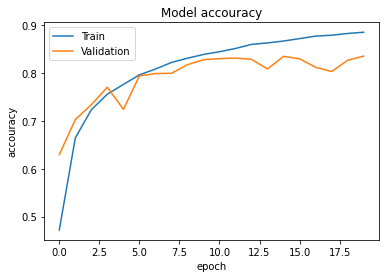

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accouracy')
plt.ylabel('accouracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show

Giá trị dự đoán:  4


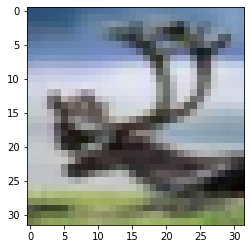

Giá trị dự đoán:  6


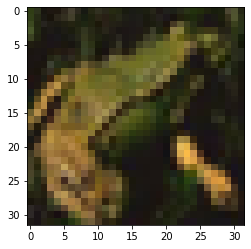

In [ ]:
for i in range(40,42):
  plt.imshow(x_test[i].reshape(32,32,3), cmap='gray')
  y_predict = model.predict(x_test[i].reshape(1,32,32,3))
  print('Giá trị dự đoán: ', np.argmax(y_predict))
  plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving deer.png to deer.png


Giá trị dự đoán: 4


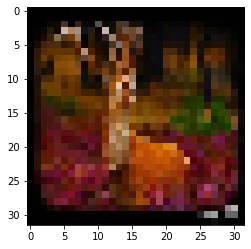

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('deer.png', target_size=(32, 32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 255.0

# load model
#model_final = load_model('final_model.h5')
plt.imshow(img.reshape(32,32,3), cmap='gray')
# predict the class
result = model.predict(img.reshape(1,32,32,3))
print('Giá trị dự đoán:', np.argmax(result))
plt.show()